In [1]:
import pandas as pd
import numpy as np
import cv2 as cv


In [15]:
import idx2numpy
import matplotlib.pyplot as plt

In [59]:
##reading_images
file = 'faishon_mnist/train-images-idx3-ubyte'
training_data = idx2numpy.convert_from_file(file)


file="faishon_mnist/t10k-images-idx3-ubyte"
test_data=idx2numpy.convert_from_file(file)

##reading labels

file = 'faishon_mnist/train-labels-idx1-ubyte'
training_labels = idx2numpy.convert_from_file(file)


file="faishon_mnist/t10k-labels-idx1-ubyte"
test_labels=idx2numpy.convert_from_file(file)


In [60]:
training_data=np.expand_dims(training_data,axis=1)
test_data=np.expand_dims(test_data,axis=1)

In [62]:
training_data=training_data.reshape(60000,28,28,1)
test_data=test_data.reshape(10000,28,28,1)
print(test_data.shape,training_data.shape)


(10000, 28, 28, 1) (60000, 28, 28, 1)


In [63]:
print(test_labels.shape,training_labels.shape)

(10000,) (60000,)


In [64]:
#plt.imshow(training_data[4][1:])
print(training_labels[4])

0


In [65]:
labels={0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

# now defining the model

In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Activation

In [69]:
## 
model=Sequential()
model.add(Conv2D(32,kernel_size=3,input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
model.fit(training_data,training_labels,validation_data=(test_data,test_labels),epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 57s 951us/sample - loss: 0.2988 - accuracy: 0.8895 - val_loss: 0.3447 - val_accuracy: 0.8774
Epoch 2/50
60000/60000 [==============================] - 56s 933us/sample - loss: 0.2937 - accuracy: 0.8904 - val_loss: 0.3279 - val_accuracy: 0.8862
Epoch 3/50
60000/60000 [==============================] - 56s 941us/sample - loss: 0.2908 - accuracy: 0.8916 - val_loss: 0.3364 - val_accuracy: 0.8872
Epoch 4/50
60000/60000 [==============================] - 56s 939us/sample - loss: 0.2857 - accuracy: 0.8932 - val_loss: 0.3169 - val_accuracy: 0.8877
Epoch 5/50
60000/60000 [==============================] - 57s 945us/sample - loss: 0.2797 - accuracy: 0.8956 - val_loss: 0.3259 - val_accuracy: 0.8881
Epoch 6/50
60000/60000 [==============================] - 57s 946us/sample - loss: 0.2843 - accuracy: 0.8937 - val_loss: 0.3264 - val_accuracy: 0.8877
Epoch 7/50
60000/60000 [====================

In [72]:
model.save("faishon_mnist/model.h5")

In [128]:
score=model.evaluate(test_data,test_labels)
print("The accuracy of model in test data is: {} %".format(round(score[1]*100,3)))
print("The loss of model in test data is :  {}".format(round(score[0],3)))

10000/10000 [==============================] - 3s 271us/sample - loss: 0.4407 - accuracy: 0.8898
The accuracy of model in test data is: 88.98 %
The loss of model in test data is :  0.441


In [78]:
def explore(image,label):
    image=image.reshape(28,28,1)
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    print("#################",labels[label],"########")
    

################# Sandal ########


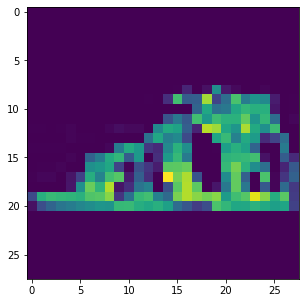

In [87]:
k=11
explore(test_data[k],test_labels[k])

In [106]:
##automating the classification task

# As in case of faishon nist dataset the images are already given in the form of numpy array but in thr real word we have the images in the folder so, this code is used for different datasets


In [102]:
## importing necessary Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import PIL 
from PIL import Image
import cv2 as cv
import os


## importing tenserflow libraries for making deeplearning Model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Activation




## the data should be in different folder train_data_folder and test_data_folder and in these folder we must have subfolder containing images of different categories

In [110]:
train_folder="train_folder_location"
test_folder="test_folder_location"


In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,shear_range=.2,zoom_range=.2)
test_datagen=ImageDataGenerator(rescale=1/255)

In [111]:
train_generator=train_datagen.flow_from_directory(train_folder,target_size=(224,224),class_mode='categorical',shuffle=True,batch_size=25)
test_generator=train_datagen.flow_from_directory(test_folder,target_size=(224,224),class_mode='categorical',shuffle=True,batch_size=25)


In [112]:
labels=train_generator.class_indices

### we have large dataset in real word so we are using Transfer learning instead of making our new model from scratch 

In [ ]:
no_of_classes=len(labels)

In [ ]:
#transfer learning
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in vgg.layers:
    layer.trainable=False
x=Flatten()(vgg.output)
x=Dense(50,activation='relu')(x)
final=Dense(no_of_classes,activation='softmax')(x)
model1=Model(inputs=vgg.input,outputs=final)
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit_generator(train_generator,epochs=25,steps_per_epoch=len(train_generator),validation_generator=test_generator)

In [ ]:
model1.save("faishon_mnist/model.h5")